<h2 align="center">Effect of COVID-19 on 20 tech stocks</h2>
<p> COVID-19 has changed our lives. We are in lockdown, and have had to make major changes to our lifestyles. The stock market has had to deal with some drastic changes of its own. In this project I will explore the fate of some of tech stocks to see how good (or bad) they have braved the COVID-19 storm.

Disclaimer: this project is meant for some basic pandas and viz skills practice and **should not** be used to derive any financial advice. </p>

In [2]:
%%html
<style type="text/css">

 body {
     background-color: #4CB1F7;
     margin: 0;
     padding: 6em;
     font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
     font-size: 1em;
}



 h2 {
     color: #0339A6;
     height: 3em;
     width: 100%;
     margin-bottom: 1em;
     font-size: 2em;  
 }

div.output_area {
    width: 100%;
    font-size: 1.1em;
    color: #565656;
}

div.output_area pre {
    font-size: 1.1em;
    padding: 1.5em;
}

div.output_png.output_subarea {
    max-width: 100%;
}

</style>

In [5]:
import datetime

now = datetime.datetime.now()
print("Last updated:", now.strftime("%Y-%m-%d" + " at "+ "%H:%M:%S"))

Last updated: 2020-06-09 at 15:07:24


### Get the Data

In this section I use pandas to scrape data from Yahoo! finance using pandas.

In [7]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline


#Plotly Method Imports
import plotly # You can use matplotlib as well for these plots as well
import cufflinks as cf 
cf.go_offline()

The stock data for these tickers are queried from Jan 1st 2017 to current date and saved in their own dataframes.

stock tickers are as follows:
MSFT, AAPL, AMZN, GOOG, BABA, FB, INTC, NVDA, CRM, PYPL, TSLA, AMD, EA, MTCH, TTD, ZG, ATVI, YELP, TIVO, ZM and VMW

In [8]:
start = datetime.datetime(2017, 1, 1) # START ON January 1 2017
end = datetime.date.today() # LOOK AT STOCKS TILL current date

tickers = ['MSFT','AAPL','AMZN','GOOG','BABA','FB','INTC','NVDA','CRM','PYPL','TSLA','AMD','EA','MTCH','TTD','ZG','ATVI','YELP','TIVO','ZM','VMW']
df_map = {}

for tick in tickers:
    stock = data.DataReader(tick, 'yahoo', start, end)
    df_map[tick] = stock

In [9]:
#Using pd.concat to concatenate the stock dataframes together to a single data frame called tech_stocks

In [10]:
tech_stocks = pd.concat(df_map,axis = 1,keys = tickers)
tech_stocks.columns.names = ['Stock Ticker','Stock Info']
tech_stocks.tail()

Stock Ticker        MSFT                                                  \
Stock Info          High         Low        Open       Close      Volume   
Date                                                                       
2020-06-03    185.940002  183.580002  184.820007  185.360001  27311000.0   
2020-06-04    185.839996  182.300003  184.300003  182.919998  28761800.0   
2020-06-05    187.729996  182.009995  182.619995  187.199997  39893600.0   
2020-06-08    188.550003  184.440002  185.940002  188.360001  33171000.0   
2020-06-09    190.699997  187.260498  188.000000  189.800003  28820688.0   

Stock Ticker                    AAPL                                      ...  \
Stock Info     Adj Close        High         Low        Open       Close  ...   
Date                                                                      ...   
2020-06-03    185.360001  326.200012  322.299988  324.660004  325.119995  ...   
2020-06-04    182.919998  325.619995  320.779999  324.390015  322.320007  ...   
2020-06-05    187.199997  331.750000  323.230011  323.350006  331.500000  ...   
2020-06-08    188.360001  333.600006  327.320007  330.250000  333.459991  ...   
2020-06-09    189.800003  345.609894  332.010010  332.140015  343.989990  ...   

Stock Ticker          ZM                                             VMW  \
Stock Info          Open       Close      Volume   Adj Close        High   
Date                                                                       
2020-06-03    211.699997  223.869995  32390100.0  223.869995  152.490005   
2020-06-04    221.000000  210.350006  20212600.0  210.350006  150.149994   
2020-06-05    200.110001  207.600006  16298700.0  207.600006  152.190002   
2020-06-08    204.350006  209.830002  10446600.0  209.830002  153.190002   
2020-06-09    209.830002  205.429993   7407105.0  205.429993  151.850006   

Stock Ticker                                                             
Stock Info           Low        Open       Close     Volume   Adj Close  
Date                                                                     
2020-06-03    149.300003  151.940002  149.389999  1222400.0  149.389999  
2020-06-04    146.880005  148.509995  148.080002  1318100.0  148.080002  
2020-06-05    148.699997  148.960007  149.770004  1531100.0  149.770004  
2020-06-08    148.639999  151.199997  151.850006  1357900.0  151.850006  
2020-06-09    146.410004  151.619995  146.410004  1174856.0  146.410004  

[5 rows x 126 columns]

What is the maximum and minimum of the Close price for each tech company's stock throughout the time period? Let's also use a bar plot to visualize the data as well.

Note: We use a log scale for close price to normalize the values to a uniform scale.

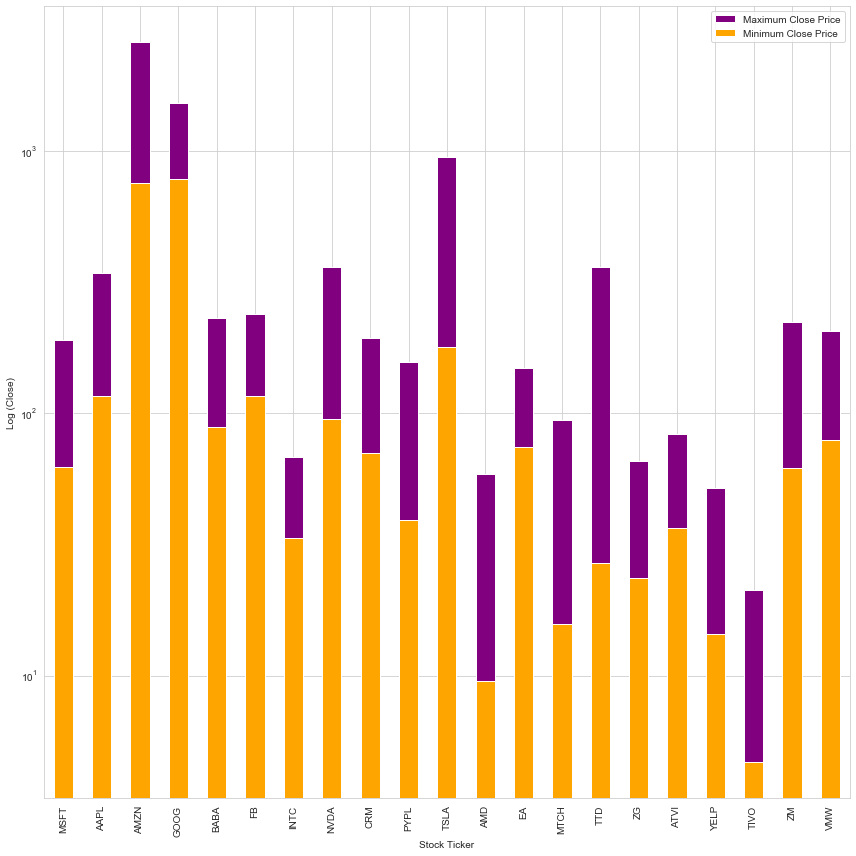

In [11]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
max_close = tech_stocks.xs(key='Close',axis=1,level='Stock Info').max()
min_close = tech_stocks.xs(key='Close',axis=1,level='Stock Info').min()
plt.figure(figsize=(12,12))
plt.yscale('log')
plt.tight_layout()
plt.ylabel('Log (Close)')
max_close.plot(kind='bar',color='purple',label='Maximum Close Price')
min_close.plot(kind='bar',color='orange',label='Minimum Close Price')
plt.legend()
plt.tight_layout()

Using the bar-plot above, stocks can be classified into two broad groups: Reliable stocks and Volatile stocks. 

**Reliable stocks** are the ones that didnot show much difference between the minimum Close price and maximum Close Price in the time period specified. e.g.: GOOG and AMZN. 
**Volatile stocks** are the ones that fluctate the most between the minimum and maximum closing price of stocks. e.g.: TTD and TIVO

However, a more interesting comparison is to compare the same data against two separate time-periods: Pre-COVID-19 and Post-COVID-19.

Text(0.5, 1.0, 'Post COVID-19: Jan 2020 - Today')

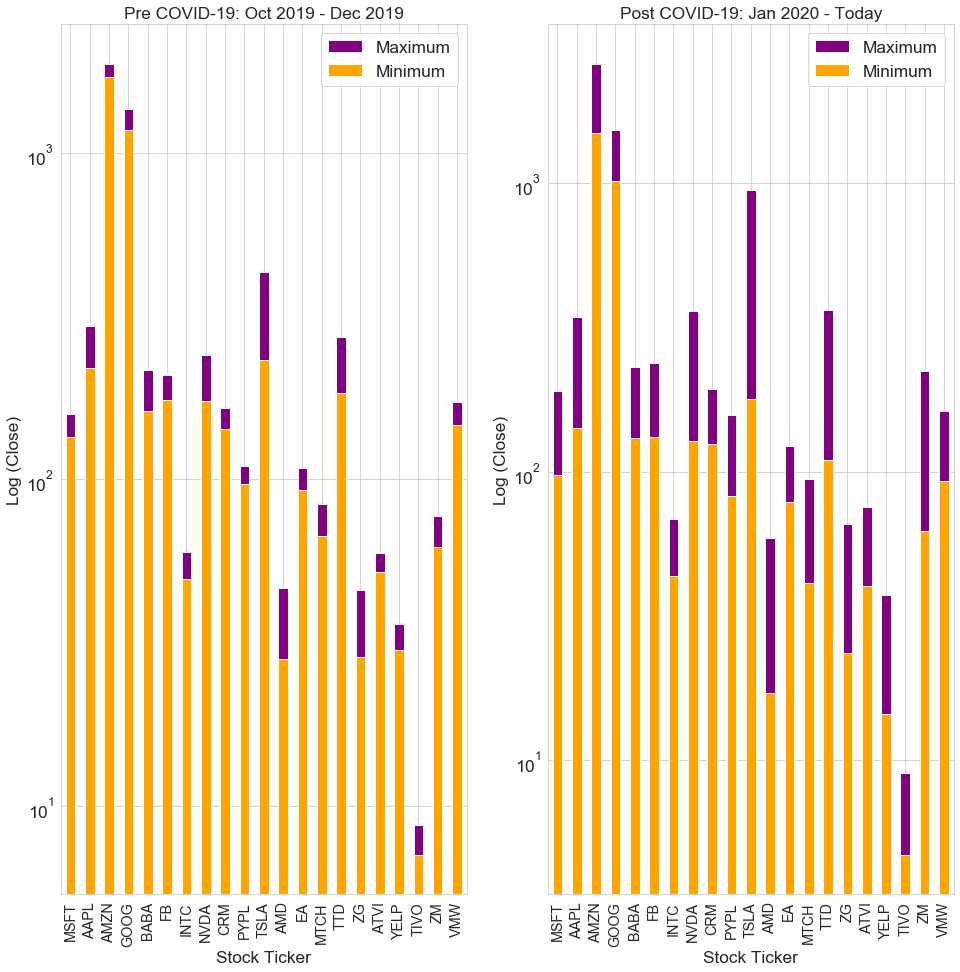

In [12]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
current_date_str = datetime.date.today().strftime("%Y-%m-%d") #to store the current date as a string
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(16,16))


max_close_pre_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2019-10-01':'2019-12-31'].max()
min_close_pre_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2019-10-01':'2019-12-31'].min()
#plot
max_close_pre_corona.plot(kind='bar',ax = axes[0],subplots=True,color='purple')
min_close_pre_corona.plot(kind='bar',ax = axes[0],subplots=True,color='orange')
axes[0].set_yscale('log')
axes[0].set_ylabel('Log (Close)')
axes[0].legend(["Maximum", "Minimum"])
axes[0].set_title('Pre COVID-19: Oct 2019 - Dec 2019')

max_close_post_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2020-01-01':current_date_str].max()
min_close_post_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2019-01-01':current_date_str].min()
#plot
max_close_post_corona.plot(kind='bar',ax = axes[1],subplots=True,color='purple')
min_close_post_corona.plot(kind='bar',ax = axes[1],subplots=True,color='orange')
axes[1].set_yscale('log')
axes[1].set_ylabel('Log (Close)')
axes[1].legend(["Maximum", "Minimum"])
axes[1].set_title('Post COVID-19: Jan 2020 - Today')


It is clear that the more **Reliable** stocks like AAPL and AMZN in the pre COVID-19 period saw significant volatility in their closing prices once the COVID-19 storm hit.    

The next analysis is to use pandas pct_change() method on the Close column to create a **Returns** value. A return is defined as the change in price of stocks over time, which may be represented in terms of price change or percentage change. A positive return represents a profit while a negative return marks a loss.

In [13]:
returns = pd.DataFrame() #empty dataframe
for tick in tickers:
    returns[tick+' Return'] = tech_stocks[tick]['Close'].pct_change()
returns.tail()

,MSFT Return,AAPL Return,AMZN Return,GOOG Return,BABA Return,FB Return,INTC Return,NVDA Return,CRM Return,PYPL Return,...,AMD Return,EA Return,MTCH Return,TTD Return,ZG Return,ATVI Return,YELP Return,TIVO Return,ZM Return,VMW Return
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-03,0.002434,0.005505,0.002423,-0.001973,0.019969,-0.011000,-0.003059,-0.006317,0.004362,-0.004508,...,-0.015129,-0.036205,-0.003709,0.115377,0.047370,-0.041929,0.057869,0.0,0.075884,-0.023212
2020-06-04,-0.013164,-0.008612,-0.007182,-0.016848,-0.002607,-0.016814,0.016793,-0.000342,-0.020287,-0.013905,...,-0.001896,-0.006360,-0.027976,-0.049975,-0.012071,-0.001573,-0.032739,0.0,-0.060392,-0.008769
2020-06-05,0.023398,0.028481,0.009103,0.018560,0.006925,0.019798,0.021756,0.017510,0.014232,0.009056,...,0.008930,0.009729,-0.014117,0.050558,-0.030303,-0.005443,0.159383,0.0,-0.013073,0.011413
2020-06-08,0.006197,0.005912,0.016536,0.005715,-0.002505,0.002730,-0.010413,-0.012892,0.015355,0.000577,...,-0.002448,0.010057,-0.006438,0.011347,0.044187,0.018724,0.013304,0.0,0.010742,0.013888
2020-06-09,0.007645,0.031578,0.030427,0.006602,0.007854,0.031417,-0.009895,0.027371,-0.011272,0.004933,...,0.064565,0.013053,0.002011,0.013033,-0.018665,0.017956,-0.072939,0.0,-0.020969,-0.035825


A looks at the minimum and maximum returns for each stock tick in this time-period:

In [14]:
returns.idxmin()

MSFT Return   2020-03-16
AAPL Return   2020-03-16
AMZN Return   2020-03-12
GOOG Return   2020-03-16
BABA Return   2020-03-16
FB Return     2018-07-26
INTC Return   2020-03-16
NVDA Return   2018-11-16
CRM Return    2020-03-16
PYPL Return   2020-03-16
TSLA Return   2020-03-16
AMD Return    2017-05-02
EA Return     2019-02-06
MTCH Return   2018-05-01
TTD Return    2020-03-16
ZG Return     2018-11-07
ATVI Return   2018-11-09
YELP Return   2018-11-09
TIVO Return   2020-03-16
ZM Return     2020-03-24
VMW Return    2018-01-29
dtype: datetime64[ns]

It is interesting to note that most of these stocks had their lowest return in March 2020

In [15]:
returns.idxmax()

MSFT Return   2020-03-13
AAPL Return   2020-03-13
AMZN Return   2017-10-27
GOOG Return   2019-07-26
BABA Return   2017-06-08
FB Return     2019-01-31
INTC Return   2020-03-13
NVDA Return   2017-05-10
CRM Return    2018-11-28
PYPL Return   2020-03-24
TSLA Return   2020-02-03
AMD Return    2019-01-30
EA Return     2019-02-08
MTCH Return   2019-08-07
TTD Return    2018-05-11
ZG Return     2019-02-22
ATVI Return   2017-02-10
YELP Return   2017-08-04
TIVO Return   2020-02-19
ZM Return     2020-03-23
VMW Return    2020-03-13
dtype: datetime64[ns]

And for some, their highest returns were seen in March 2020 as well thereby confirming that the COVID-19 has indeed rendered the stock market more unpredictable than in the recent past.

Now, two new series, named `pre_corona` and `post_corona` are initialised with the standard deviation of stock returns from October - December 2019 and standard deviation of stock returns from January - March 2020, respectively. This series is sorted and hence if the stocks occur at the right end of the chart, they are deemed **volatile** with significant values of standard deviation whereas if they occur on the left they could be deemed **reliable**.

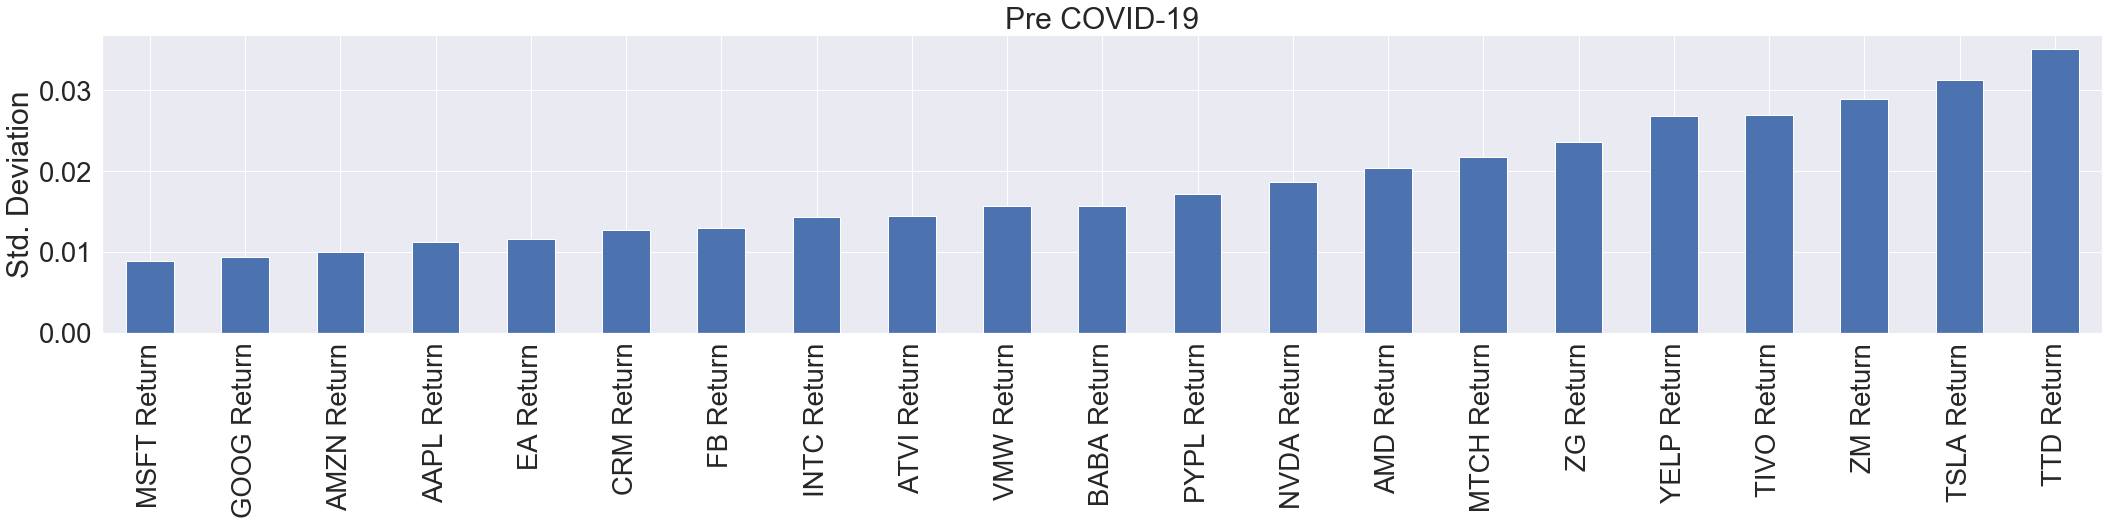

In [16]:
pre_corona=returns.loc['2019-10-01':'2019-12-31'].std()
sns.set(font_scale=2.5)
plt.figure(figsize=(30,8))
pre_corona.sort_values().plot.bar(title="Pre COVID-19")
plt.ylabel("Std. Deviation")
plt.tight_layout()

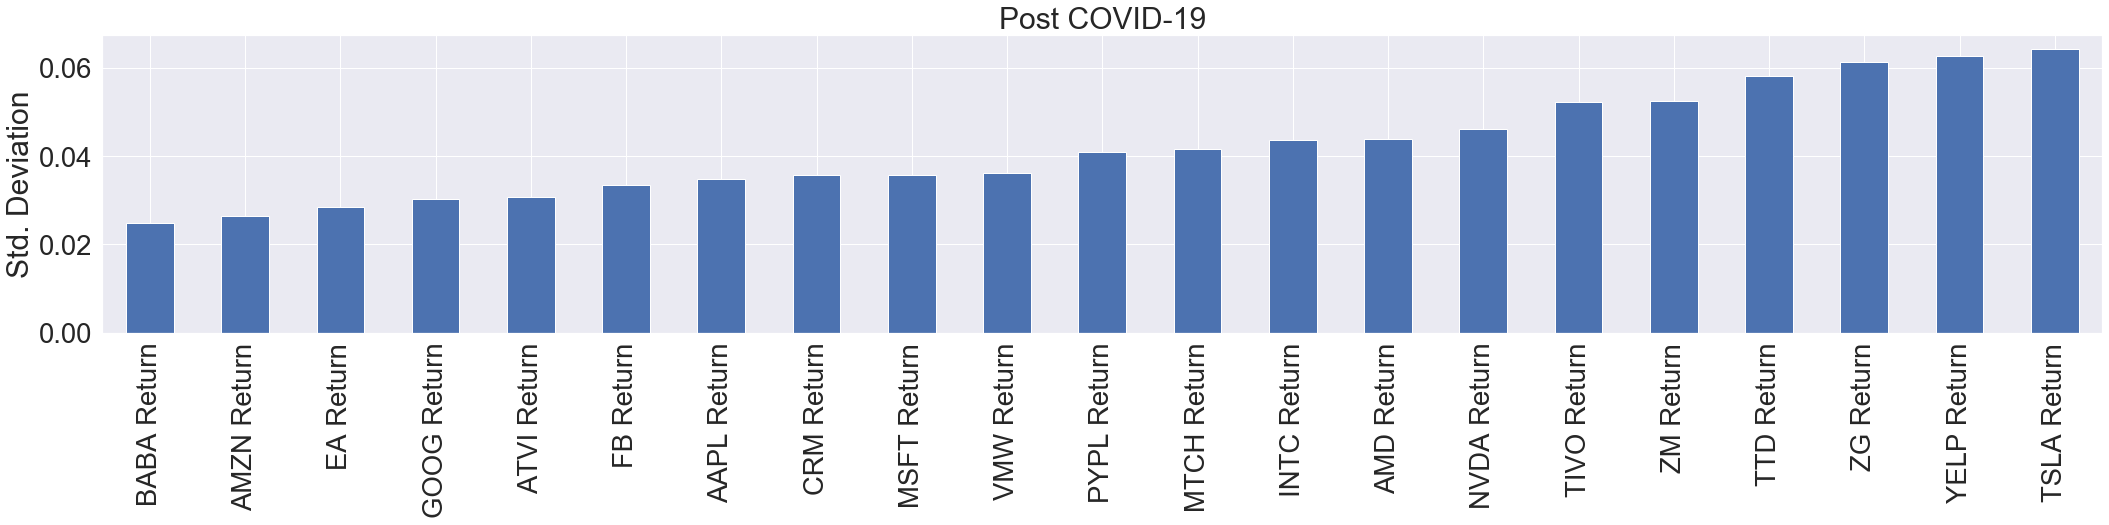

In [17]:
post_corona=returns.loc['2020-01-01':current_date_str].std()
sns.set(font_scale=2.5)
plt.figure(figsize=(30,8))
post_corona.sort_values().plot.bar(title="Post COVID-19")
plt.ylabel("Std. Deviation")
plt.tight_layout()

It is clear that MSFT has suffered the most - shifting from the most **reliable** stock to a relatively **volatile** stock due to this pandemic!

From the above collection, let's choose 5 stocks that have suffered significant effects. I am picking the following - MSFT, BABA, AAPL, MTCH and ZM. Interesting is the irregularity of ZM stocks (that provides a video conferencing service) which shot up to being a necessary tool for all kinds of Work from Home requirements. 

In [19]:
selected_tickers = ['MSFT', 'BABA', 'AAPL', 'MTCH','ZM']
selected_tech_stocks = pd.concat([df_map['MSFT'],df_map['BABA'],df_map['AAPL'],df_map['MTCH'],df_map['ZM']],axis=1,keys=selected_tickers)
selected_tech_stocks.columns.names = ['Stock Ticker','Stock Info']
selected_tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2019-10-01':current_date_str].iplot(width=3.5)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.tight_layout()

Finally: Using a heatmap of the correlation between the selected stocks Close Price

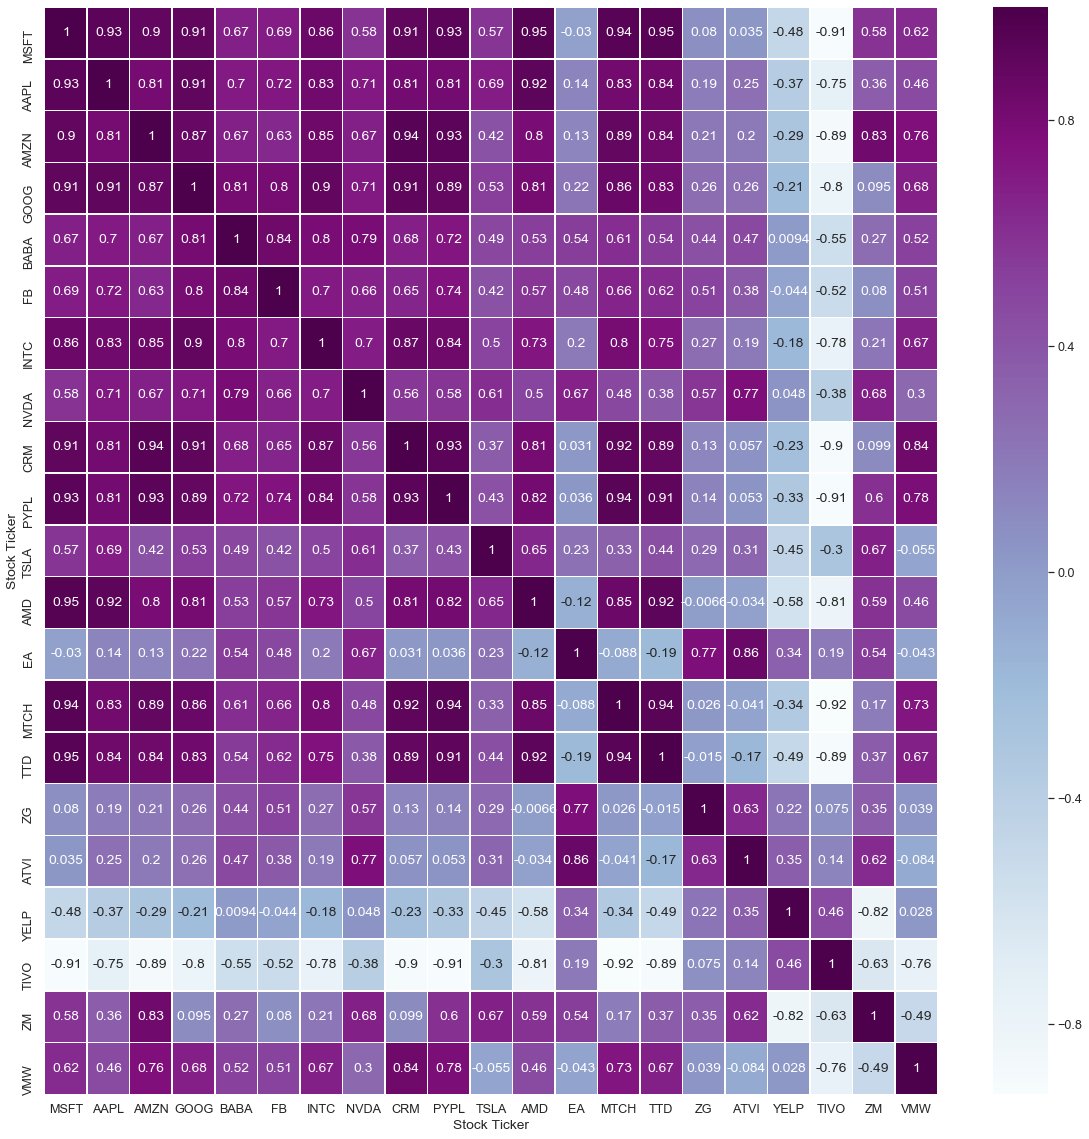

<Figure size 432x288 with 0 Axes>

In [42]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.15)
sns.heatmap(tech_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),linewidths=.5,cmap='BuPu',annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()
plt.tight_layout()